In [1]:
import os
import torch
import numpy as np
import pandas as pd
import math

import sklearn.metrics as metrics
from sklearn.metrics import auc

In [6]:
path_pred = 'prediction'+os.sep+'prediction__0.3_cv0_alpha4_gene_dep_and_expr_rwr3_dt_testing'
scores = torch.load(path_pred)


In [2]:
def metricsTest(y_pred, y_true):
    
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    recall, precision, _ = metrics.precision_recall_curve(y_true, y_pred)
    roc_pr_auc = metrics.auc(precision, recall)
    
    return fpr, tpr, roc_auc, recall, precision, roc_pr_auc

def cm_function(y_true,y_pred_binary):
    print('Lenght test graphs:',len(y_true))
    print('Test synergy:',int(y_true.sum()))
    cm=metrics.confusion_matrix(y_true, y_pred_binary)
    print('\nConfusion Matrix:\n',cm)
    
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = 2*TP/(2*TP+FP+FN)
    
    print('\nPrecision:', np.round(Precision,3))
    print('Recall:', np.round(Recall,3))
    print('F1:', np.round(F1,3))
    return

def plot_auroc_prroc(mean_fpr,
                     tprs, aucs,
                     precisions, pr_aucs,
                     save=False):
    
    fig, ax = plt.subplots(1, 2, figsize=(14,4.5))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax[0].plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[0].fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax[0].set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic (ROC)",
    )
    ax[0].legend(loc="lower right")





    mean_tpr = np.mean(precisions, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(pr_aucs)
    ax[1].plot(
        mean_fpr,
        mean_tpr,
        color="b",
        label=r"Mean PR (PR-AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
        lw=2,
        alpha=0.8,
    )

    std_tpr = np.std(precisions, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax[1].fill_between(
        mean_fpr,
        tprs_lower,
        tprs_upper,
        color="grey",
        alpha=0.2,
        label=r"$\pm$ 1 std. dev.",
    )
    
    ax[1].set(
        xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Precision-Recall Curve",
    )
    ax[1].legend(loc="lower left")
    
    if save:
        plt.savefig('figurePerformances'+os.sep+'performances_GCNsynergy'+'.png')
    
    plt.show()
    return



# custom function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# define vectorized sigmoid
sigmoid_v = np.vectorize(sigmoid)



In [15]:
y_pred.astype(np.float)

array([  8.211242,  47.056564,  47.056564, ..., -30.63616 ,  21.17317 ,
        13.991683])



Fold:0
Lenght test graphs: 3548
Test synergy: 220

Confusion Matrix:
 [[3241   87]
 [ 106  114]]

Precision: 0.567
Recall: 0.518
F1: 0.542

ROC AUC: 0.9259
PR-AUC: 0.5854 



Fold:1
Lenght test graphs: 3810
Test synergy: 359

Confusion Matrix:
 [[3342  109]
 [ 178  181]]

Precision: 0.624
Recall: 0.504
F1: 0.558

ROC AUC: 0.8723
PR-AUC: 0.5853 



Fold:2
Lenght test graphs: 3692
Test synergy: 412

Confusion Matrix:
 [[3198   82]
 [ 214  198]]

Precision: 0.707
Recall: 0.481
F1: 0.572

ROC AUC: 0.9063
PR-AUC: 0.6471 



Fold:3
Lenght test graphs: 3447
Test synergy: 337

Confusion Matrix:
 [[3050   60]
 [ 205  132]]

Precision: 0.688
Recall: 0.392
F1: 0.499

ROC AUC: 0.8812
PR-AUC: 0.5689 



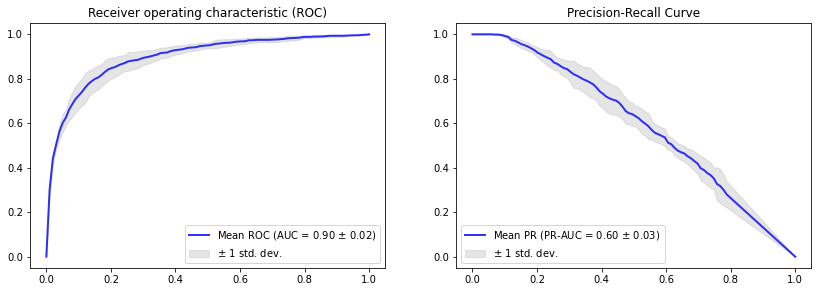

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves

path_data_test_cv = os.getcwd()+os.sep+'trainTestSplits'+os.sep
path_data_model_cv = os.getcwd()+os.sep+'modelsDir'+os.sep

tprs = []
aucs = []
precisions = []
pr_aucs = []

mean_fpr = np.linspace(0, 1, 100)

for i in range(5):
    if i not in [0,1,2,3]:
        continue
    curr_cv = 'cv'+str(i)
    run_dir = '_run_cvn'+str(i)
    path_pred = 'prediction'+os.sep+'prediction__0.3_'+str(i)+'_alpha4_gene_dep_and_expr_rwr3_dt_testing'
    scores = torch.load(run_dir+os.sep+path_pred)

    #
    ##cv1_datasetsTest_CSV3_cv5folds.pt
    #curr_test_name = path_data_test_cv+curr_cv+os.sep+curr_cv+'_datasetsTest2_CSV3_cv5folds_cvrandom.pt'
    #test_dataset = torch.load(curr_test_name)
    #batch_size = 32
    #test_loader = DataLoader(test_dataset, batch_size=batch_size)
    #
    ##Model_best_loss_ONeil_cv1_600_Epochs_32_batchSize.pt
    #curr_model_name = path_data_model_cv+curr_cv+os.sep+'Model_best_loss_ONeil_'+curr_cv+'_GAT_PT_newTraining2_32_batchSize.pt'
    #model = torch.load(curr_model_name)
    #model.eval()
    
    #y_pred_binary, y_pred, y_true = testResults(model, test_loader)
    
    y_test = scores[:,2].astype(np.float)
    y_pred = scores[:,1].astype(np.float)
    
    y_pred_binary = y_pred>30
    
    y_pred = sigmoid_v(y_pred)

    y_true = y_test>30

    print('\n\nFold:'+str(i))
    
    cm_function(y_true,y_pred_binary)
    
    fpr, tpr, roc_auc, recall, precision, roc_pr_auc = metricsTest(y_pred, y_true)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(roc_auc)
    print('\nROC AUC:',np.round(roc_auc,4))
    
    
    # fpr = recall, tpr = precision
    interp_tpr_pr = np.interp(mean_fpr, recall, precision)
    precisions.append(interp_tpr_pr)
    pr_aucs.append(roc_pr_auc)
    print('PR-AUC:',np.round(roc_pr_auc,4),'\n')


plot_auroc_prroc(mean_fpr,
                 tprs, aucs,
                 precisions, pr_aucs,
                 save=False)


In [24]:
y_pred_binary.sum()

388